# Reading OLCI data from Sentinel 3 with Pytroll/Satpy

This example shows how to read and resample Sentinel 3 OLCI level 1 data (as can be obtained on the scihub website).

## Find the files and create the scene object
To find the files, we give the base directory containing the S3* directories, and filter by time to load just one segment.

In [1]:
from datetime import datetime

from satpy import Scene, find_files_and_readers

files = find_files_and_readers(sensor='olci',
                               start_time=datetime(2018, 8, 29, 8, 26),
                               end_time=datetime(2018, 8, 29, 8, 27),
                               base_dir="/data/temp/Martin.Raspaud/s3",
                               reader='nc_olci_l1b')

scn = Scene(filenames=files)

/home/a001673/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Creating and visualizing a color composite
Here we generate a `true_color` composite and display it. It is in original data projection, no resampling has been performed yet.

/home/a001673/.local/lib/python2.7/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in less
  return func(*args2)


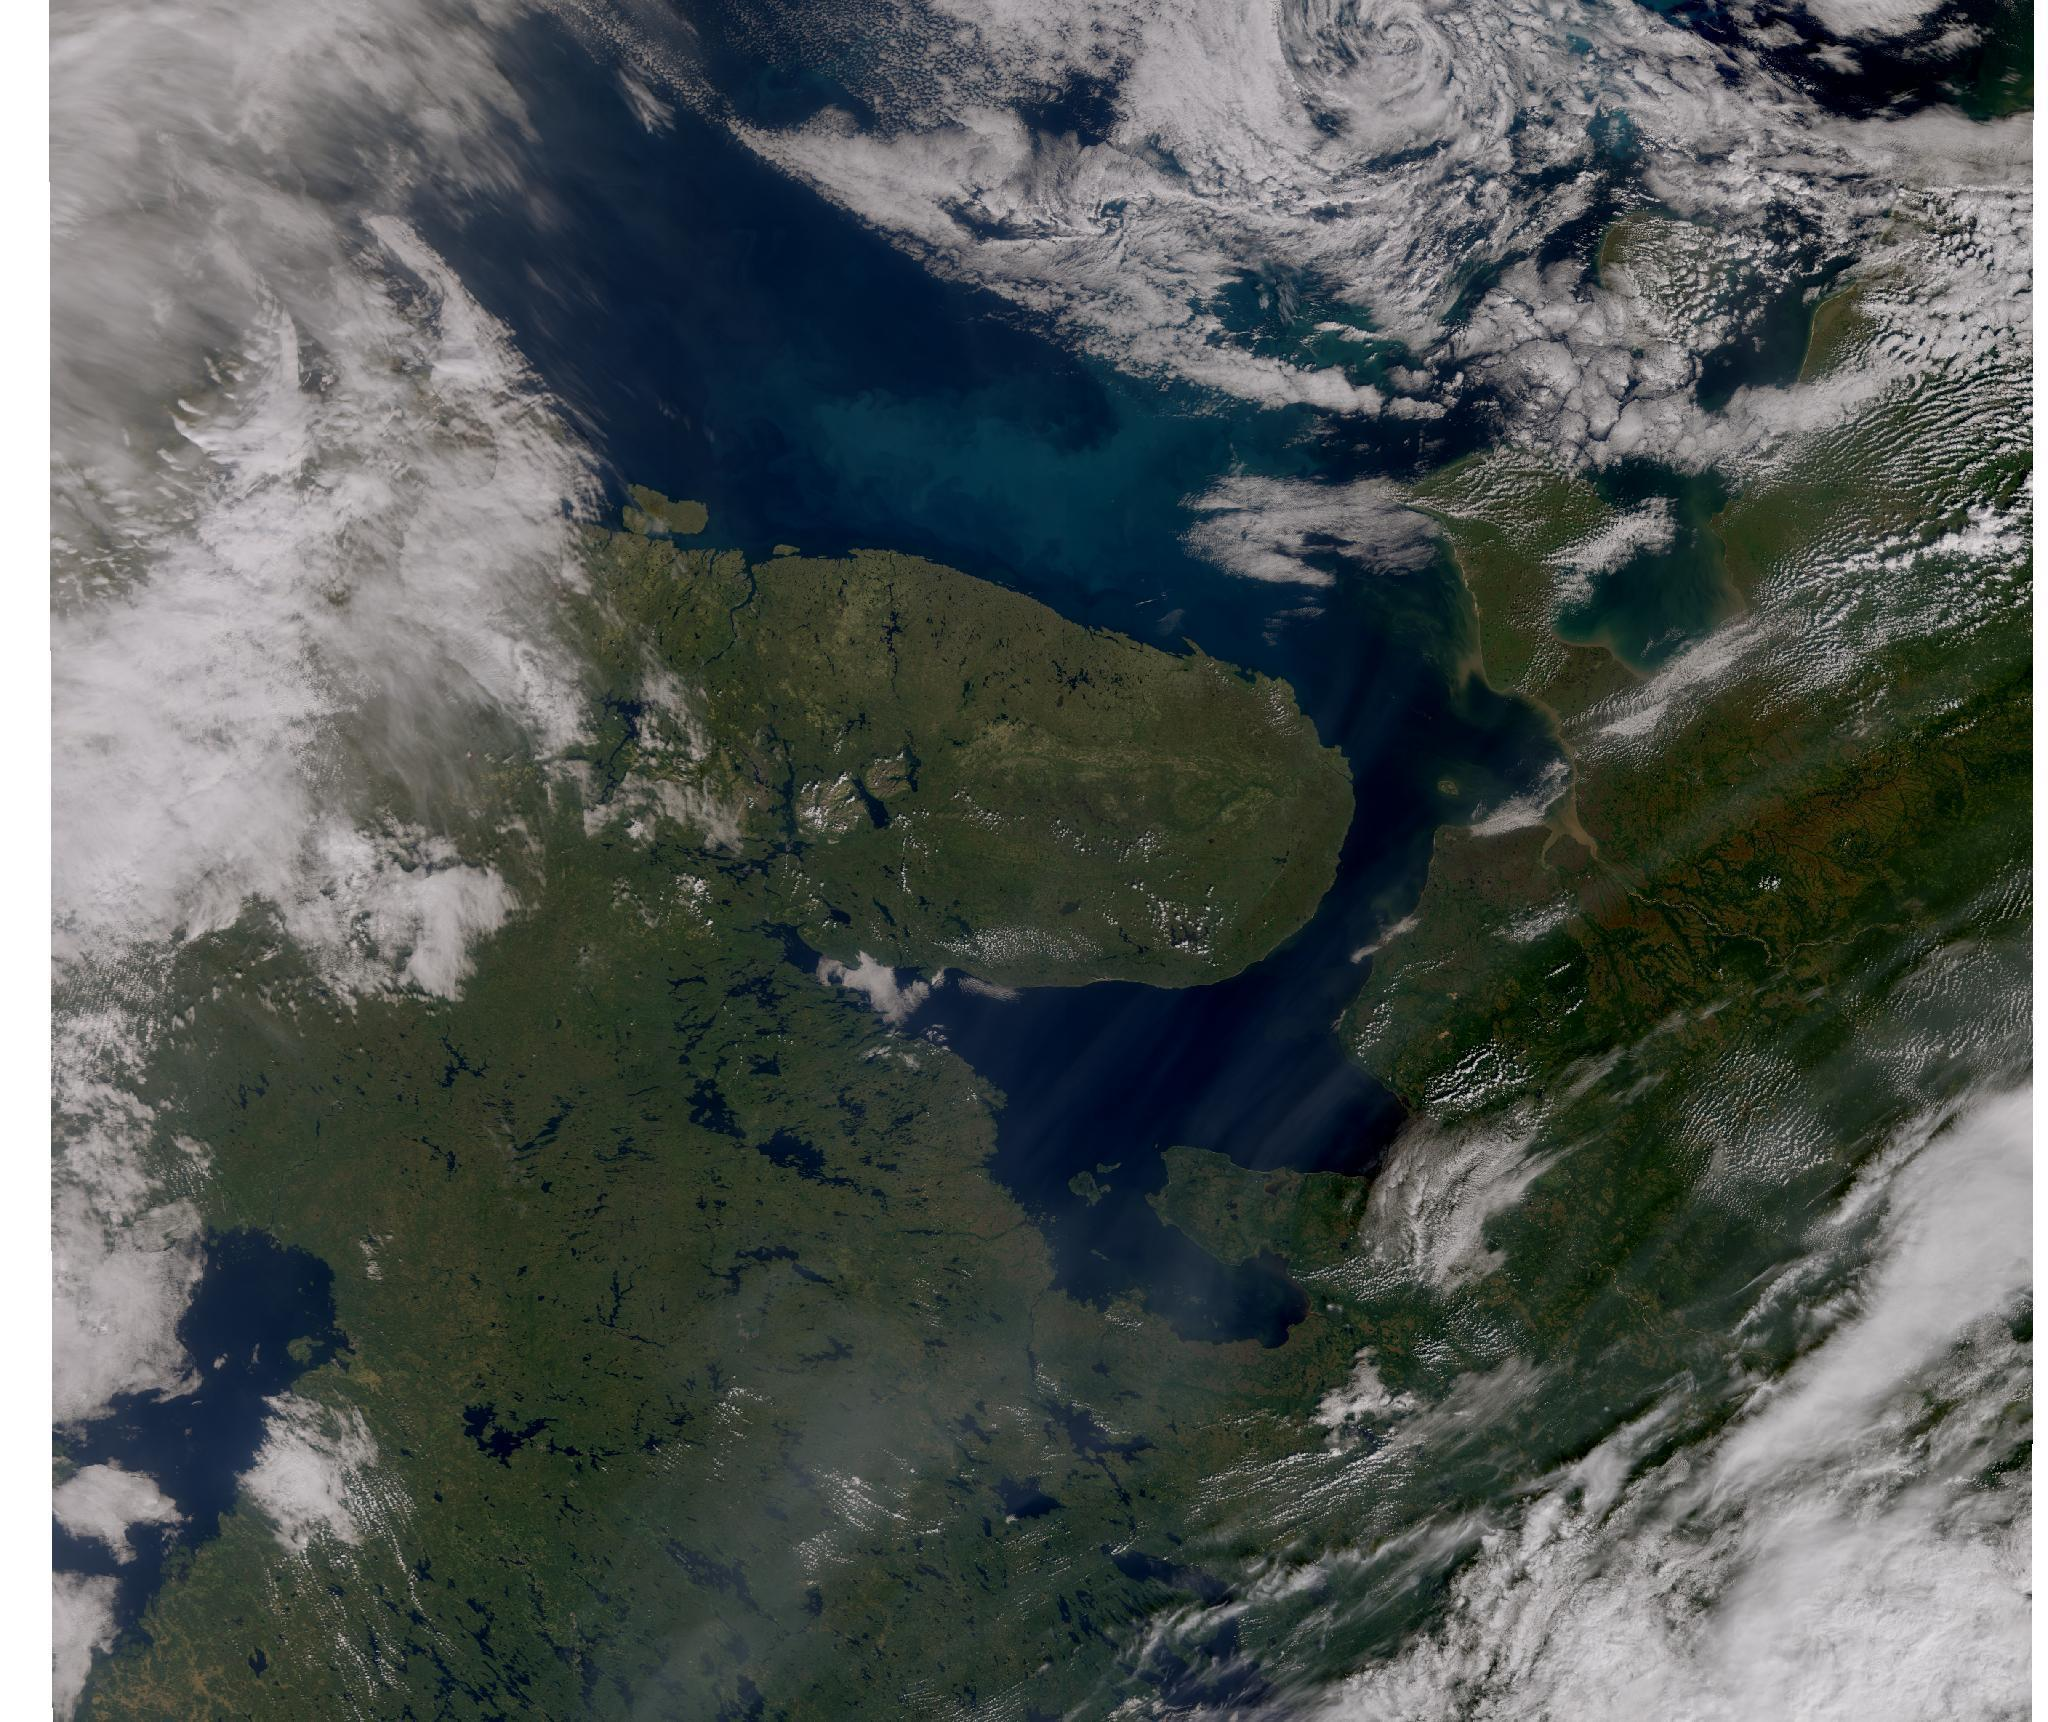

In [2]:
composite = 'true_color'

scn.load([composite])
scn.show(composite)

## Resampling the data
We now resample the data to an area covering northern Europe in polar-stereographic projection. To define such an area, have a look at the pyresample documentation.
The coastlines are added under the hood by pycoast, be sure to have it installed before running this example.

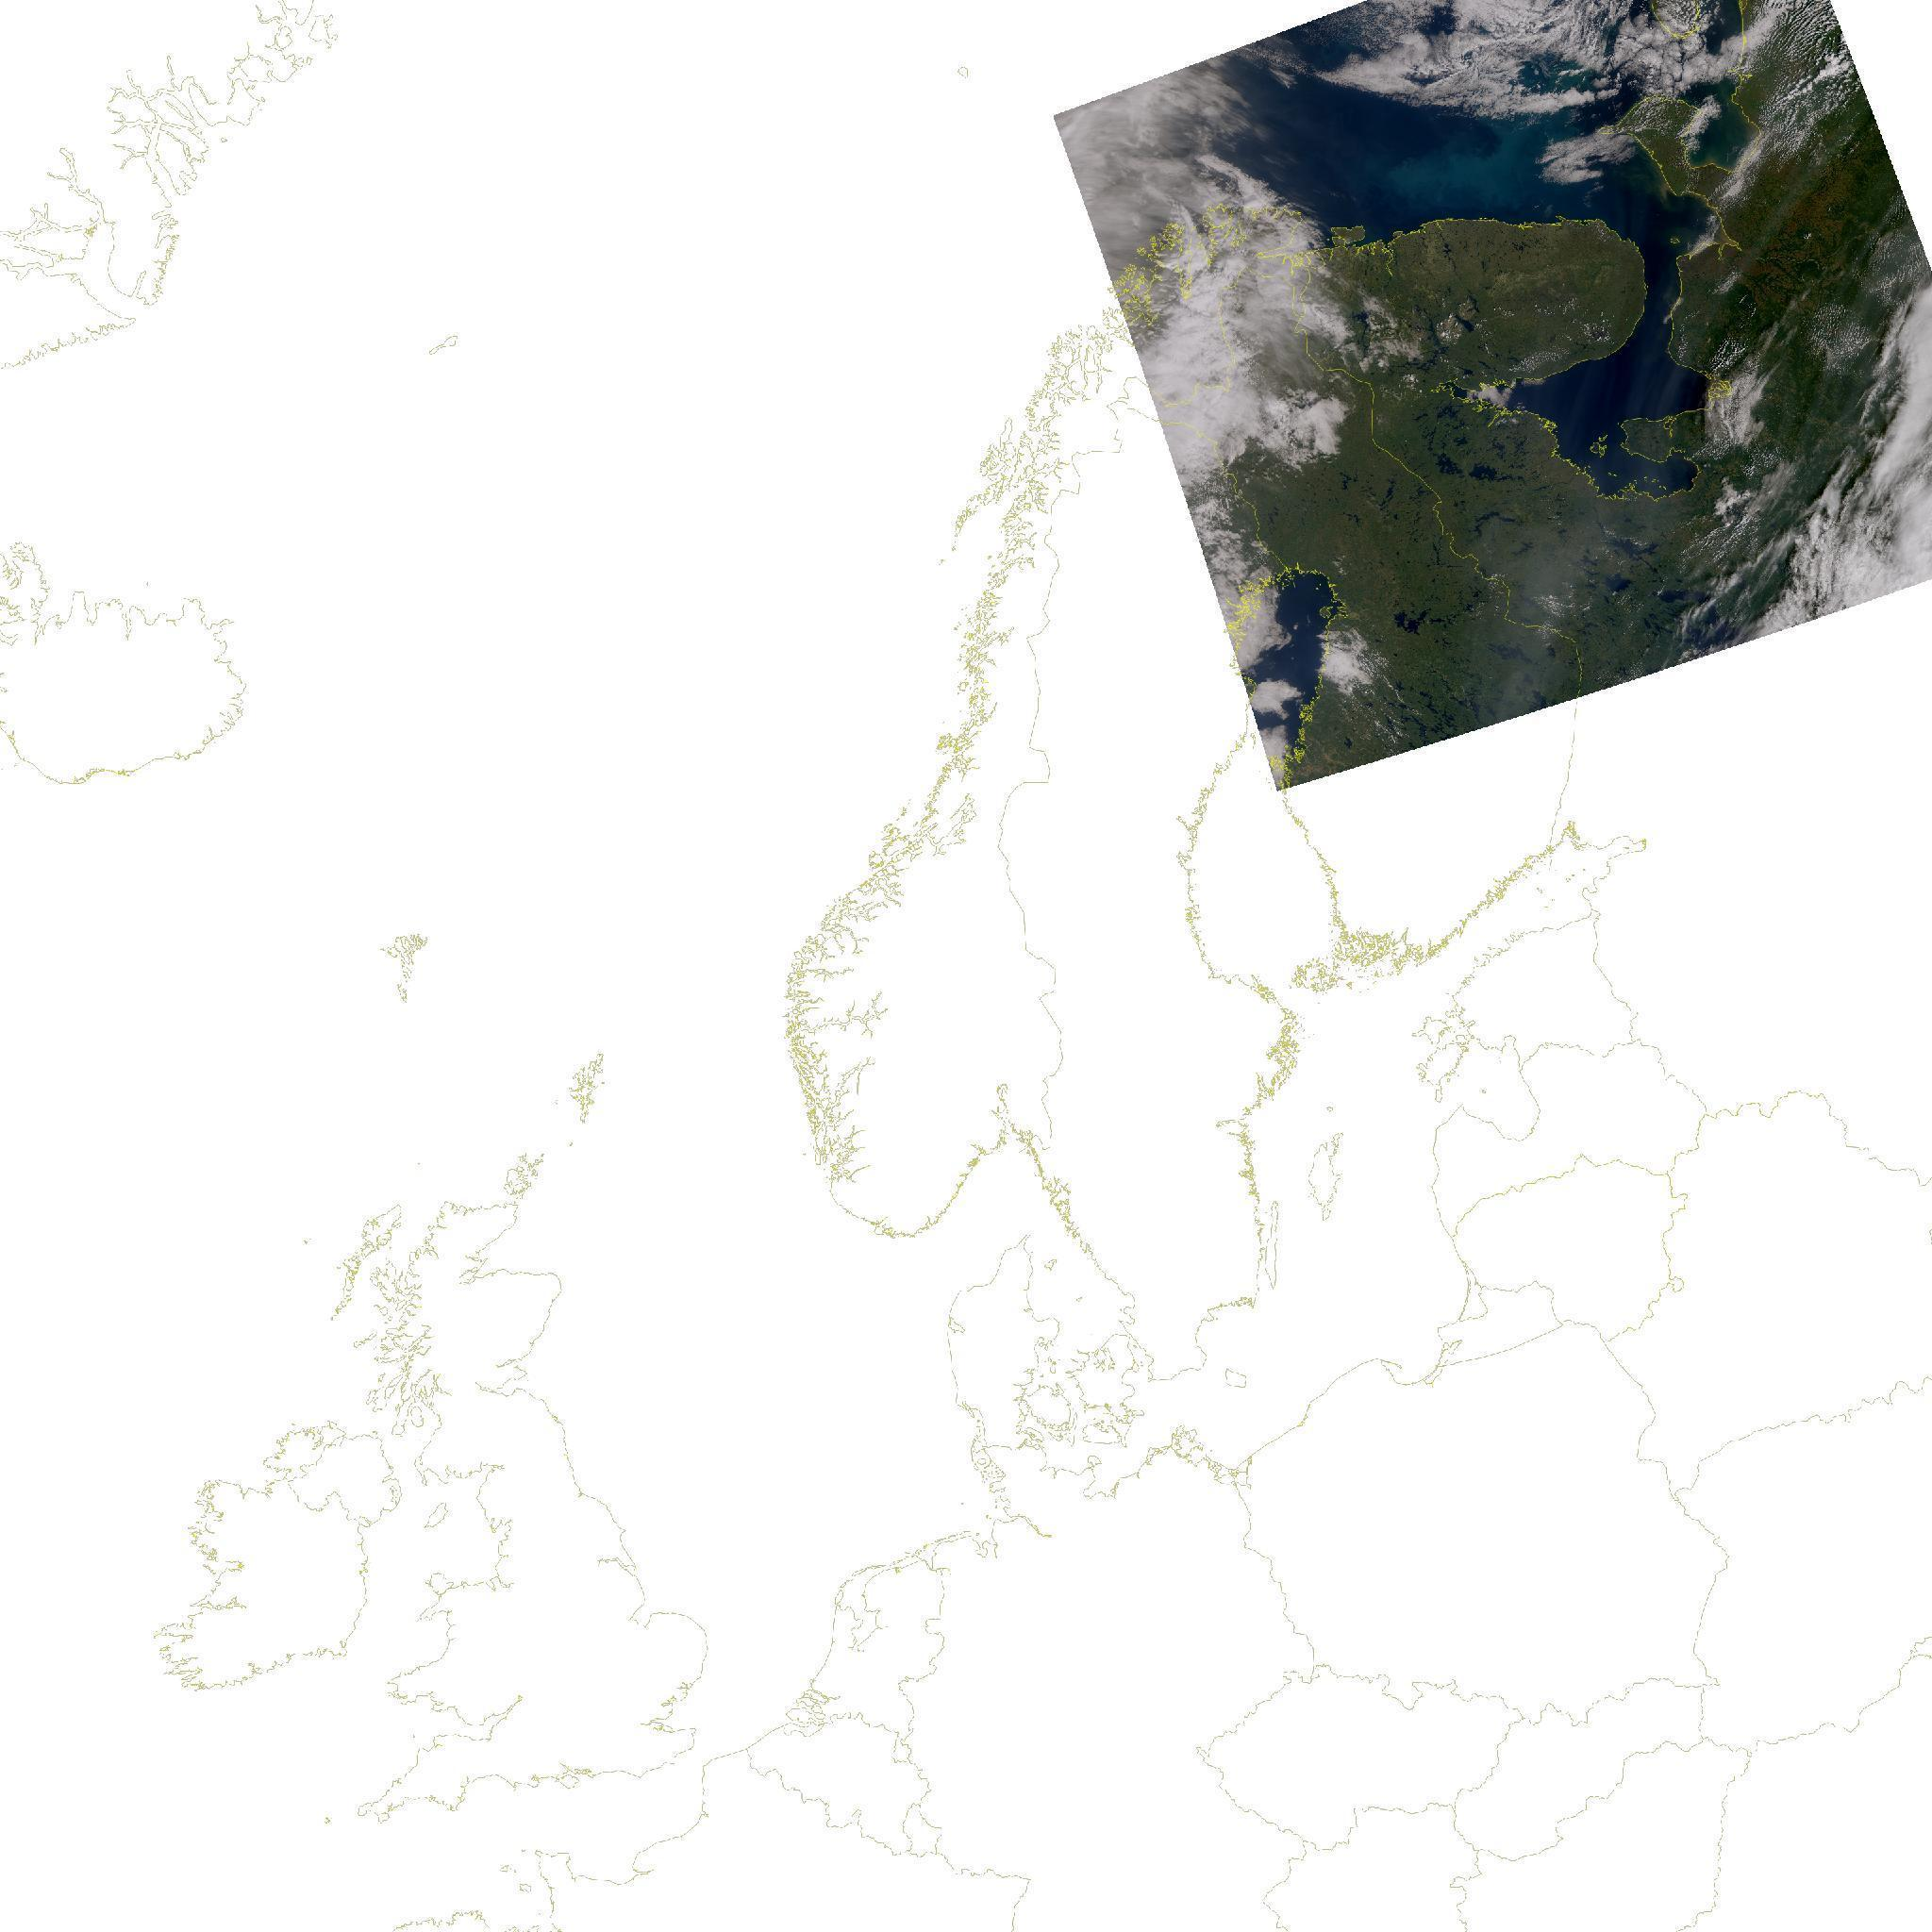

In [5]:
newscn = scn.resample('euron1')
newscn.show(composite, {'coast_dir': '/home/a001673/data/shapes/', 'color': (255, 255, 0), 'resolution': 'i'})